In [ ]:
import torch

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
!pip install 

ERROR: You must give at least one requirement to install (see "pip help install")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout


# Load the IMDB dataset from Kaggle
df = pd.read_csv('/content/IMDB Dataset.csv')

# Map the labels to 0 (negative) and 1 (positive)
df['sentiment'] = df['sentiment'].map({'negative': 0, 'positive': 1})

# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Tokenize the text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_df['review'])

X_train = tokenizer.texts_to_sequences(train_df['review'])
X_test = tokenizer.texts_to_sequences(test_df['review'])

# Pad sequences to the same length
max_len = max(len(review) for review in X_train)
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# Convert labels to numpy arrays
y_train = np.array(train_df['sentiment'])
y_test = np.array(test_df['sentiment'])

# Build the CNN model
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100

model_cnn = Sequential()
model_cnn.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model_cnn.add(Conv1D(128, 5, activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(1, activation='sigmoid'))

model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 256
epochs = 3

model_cnn.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

# Evaluate the model


Epoch 1/3
157/157 [==============================] - 35s 218ms/step - loss: 0.5085 - accuracy: 0.7346 - val_loss: 0.2944 - val_accuracy: 0.8752
Epoch 2/3
157/157 [==============================] - 26s 166ms/step - loss: 0.2449 - accuracy: 0.9052 - val_loss: 0.2421 - val_accuracy: 0.9007
Epoch 3/3
157/157 [==============================] - 24s 152ms/step - loss: 0.1604 - accuracy: 0.9441 - val_loss: 0.2391 - val_accuracy: 0.9022


In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = np.where(y_pred_prob >= 0.5, 1, 0)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_rep)


313/313 [==============================] - 2s 6ms/step
Accuracy: 0.9064
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      4961
           1       0.89      0.92      0.91      5039

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



# LSTM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Load the IMDB dataset from Kaggle
df = pd.read_csv('/content/IMDB Dataset.csv')

# Map the labels to 0 (negative) and 1 (positive)
df['sentiment'] = df['sentiment'].map({'negative': 0, 'positive': 1})

# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Tokenize the text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_df['review'])

X_train = tokenizer.texts_to_sequences(train_df['review'])
X_test = tokenizer.texts_to_sequences(test_df['review'])

# Pad sequences to the same length
max_len = max(len(review) for review in X_train)
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# Convert labels to numpy arrays
y_train = np.array(train_df['sentiment'])
y_test = np.array(test_df['sentiment'])

# Build the LSTM model
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100

model_lstm = Sequential()
model_lstm.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model_lstm.add(LSTM(128))
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 256
epochs = 5

model_lstm.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

y_pred_prob = model_lstm.predict(X_test)
y_pred = np.where(y_pred_prob >= 0.5, 1, 0)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_rep)



FileNotFoundError: ignored

In [ ]:
type(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import classification_report, accuracy_score,precision_score,f1_score, recall_score

y_pred_prob = model.predict(X_test)
y_pred = np.where(y_pred_prob >= 0.5, 1, 0)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

precision_list = []
recall_list = []
f1_list = []
accuracy_list = []



accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1_score)

print(f"Precision: {precision_list}")
print(f"Recall: {recall_list}")
print(f"F1-score: {f1_list}")
print(f"Accuracy: {accuracy_list}")


313/313 [==============================] - 53s 170ms/step
Precision: [0.5076012651770228]
Recall: [0.9872990672752531]
F1-score: [0.6704851752021563]
Accuracy: [0.511]


In [ ]:
from sklearn.metrics import classification_report, accuracy_score,precision_score,f1_score, recall_score

y_pred_prob = model_lstm.predict(X_test)
y_pred = np.where(y_pred_prob >= 0.5, 1, 0)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)



accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1_score)

print(f"Precision: {precision_list}")
print(f"Recall: {recall_list}")
print(f"F1-score: {f1_list}")
print(f"Accuracy: {accuracy_list}")


313/313 [==============================] - 8s 26ms/step
Precision: [0.8776269295145992, 0.8704468644386031]
Recall: [0.9364953363762651, 0.9200238142488589]
F1-score: [0.9061059907834103, 0.8945489628557646]
Accuracy: [0.9022, 0.8907]


[0.8907]

In [ ]:
from sklearn.metrics import classification_report, accuracy_score,precision_score,f1_score, recall_score

y_pred_prob = model_cnn.predict(X_test)
y_pred = np.where(y_pred_prob >= 0.5, 1, 0)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

precision_list = []
recall_list = []
f1_list = []
accuracy_list = []



accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1_score)

print(f"Precision: {precision_list}")
print(f"Recall: {recall_list}")
print(f"F1-score: {f1_list}")
print(f"Accuracy: {accuracy_list}")


313/313 [==============================] - 2s 5ms/step
Precision: [0.8776269295145992]
Recall: [0.9364953363762651]
F1-score: [0.9061059907834103]
Accuracy: [0.9022]


In [ ]:
print(accuracy_list)
print(precision_list)
print(recall_list)
print(f1_list)

[0.9022, 0.8907]
[0.8776269295145992, 0.8704468644386031]
[0.9364953363762651, 0.9200238142488589]
[0.9061059907834103, 0.8945489628557646]


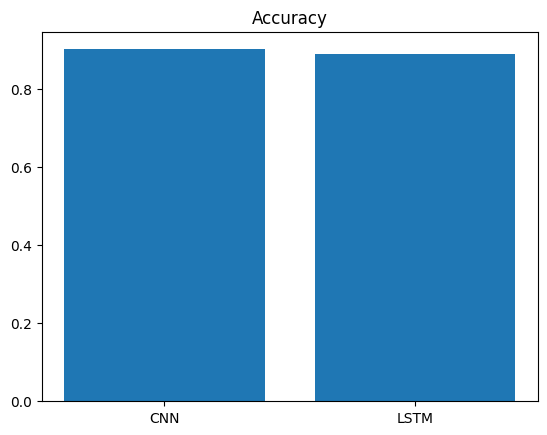

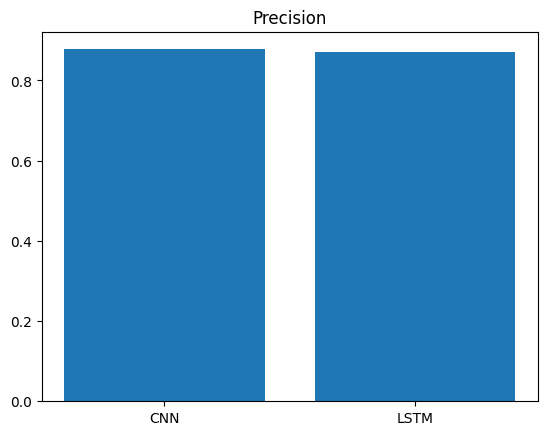

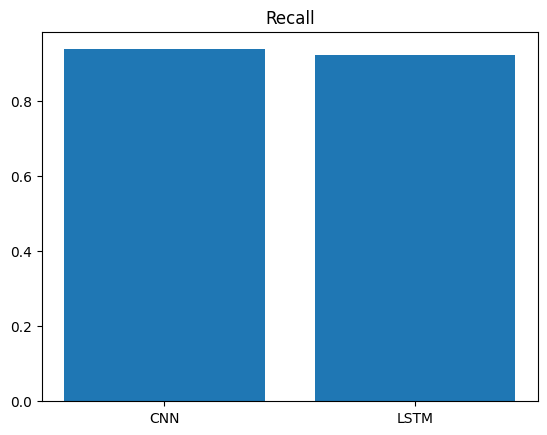

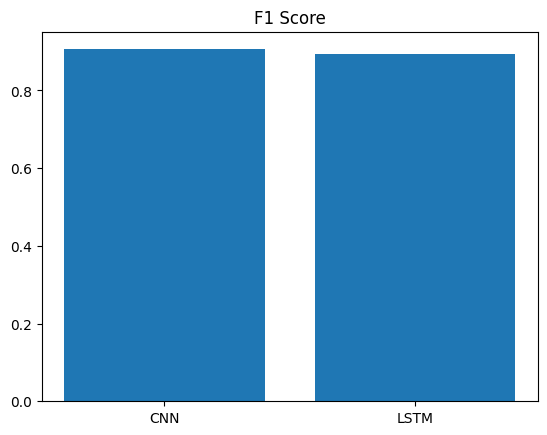

In [ ]:
import matplotlib.pyplot as plt

# Define the data to plot
accuracy_data = [(accuracy_list[0], accuracy_list[1]), ('CNN', 'LSTM')]
precision_data = [(precision_list[0], precision_list[1]), ('CNN', 'LSTM')]
recall_data = [(recall_list[0], recall_list[1]), ('CNN', 'LSTM')]
f1_data = [(f1_list[0], f1_list[1]), ('CNN', 'LSTM')]

# Create a bar graph for accuracy
plt.bar([0, 1], accuracy_data[0], tick_label=accuracy_data[1])
plt.title('Accuracy')
plt.show()

# Create a bar graph for precision
plt.bar([0, 1], precision_data[0], tick_label=precision_data[1])
plt.title('Precision')
plt.show()

# Create a bar graph for recall
plt.bar([0, 1], recall_data[0], tick_label=recall_data[1])
plt.title('Recall')
plt.show()

# Create a bar graph for F1 score
plt.bar([0, 1], f1_data[0], tick_label=f1_data[1])
plt.title('F1 Score')
plt.show()


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 37.4 MB/s eta 0:00:00


#Rotten Tomatoes Dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

In [ ]:
df_critic = pd.read_csv('/content/rotten_tomatoes_critic_reviews.csv')

In [ ]:
df_critic = df_critic.dropna()
df_critic

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
6,m/0814255,Nick Schager,False,Slant Magazine,Rotten,1/4,2010-02-10,Harry Potter knockoffs don't come more transpa...
7,m/0814255,Bill Goodykoontz,True,Arizona Republic,Fresh,3.5/5,2010-02-10,"Percy Jackson isn't a great movie, but it's a ..."
8,m/0814255,Jordan Hoffman,False,UGO,Fresh,B,2010-02-10,"Fun, brisk and imaginative"
9,m/0814255,Jim Schembri,True,The Age (Australia),Fresh,3/5,2010-02-10,"Crammed with dragons, set-destroying fights an..."
...,...,...,...,...,...,...,...,...
1130004,m/zulu,Tony Sloman,False,Radio Times,Fresh,5/5,2017-07-10,The movie is a revelation.
1130013,m/zulu_dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5/5,2007-03-07,"Seen today, it's not only a startling indictme..."
1130014,m/zulu_dawn,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,B+,2010-09-16,A rousing visual spectacle that's a prequel of...
1130015,m/zulu_dawn,Christopher Lloyd,False,Sarasota Herald-Tribune,Rotten,3.5/5,2011-02-28,"A simple two-act story: Prelude to war, and th..."


In [ ]:
df  = df_critic[['review_content', 'review_type']]

In [ ]:

# Map the labels to 0 (negative) and 1 (positive)
df['review_type'] = df['review_type'].map({'Rotten': 0, 'Fresh': 1})

<ipython-input-13-31f99de00887>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_type'] = df['review_type'].map({'Rotten': 0, 'Fresh': 1})


#CNN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

# Load the IMDB dataset from Kaggle
# df = pd.read_csv('/content/IMDB Dataset.csv')

# Map the labels to 0 (negative) and 1 (positive)
# df['review_type'] = df['review_type'].map({'Rotten': 0, 'Fresh': 1})

# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Tokenize the text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_df['review_content'])

X_train = tokenizer.texts_to_sequences(train_df['review_content'])
X_test = tokenizer.texts_to_sequences(test_df['review_content'])

# Pad sequences to the same length
max_len = max(len(review) for review in X_train)

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# Convert labels to numpy arrays
y_train = np.array(train_df['review_type'])
y_test = np.array(test_df['review_type'])

# Build the CNN model
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100

model_cnn = Sequential()
model_cnn.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model_cnn.add(Conv1D(128, 5, activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(1, activation='sigmoid'))

model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 256
epochs = 3

model_cnn.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

# Evaluate the model


Epoch 1/3
2353/2353 [==============================] - 55s 23ms/step - loss: 0.4268 - accuracy: 0.7980 - val_loss: 0.3795 - val_accuracy: 0.8249
Epoch 2/3
2353/2353 [==============================] - 26s 11ms/step - loss: 0.3574 - accuracy: 0.8399 - val_loss: 0.3697 - val_accuracy: 0.8313
Epoch 3/3
2353/2353 [==============================] - 24s 10ms/step - loss: 0.3122 - accuracy: 0.8629 - val_loss: 0.3720 - val_accuracy: 0.8339


#LSTM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Load the IMDB dataset from Kaggle
# df = pd.read_csv('/content/IMDB Dataset.csv')

# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Tokenize the text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_df['review_content'])

X_train = tokenizer.texts_to_sequences(train_df['review_content'])
X_test = tokenizer.texts_to_sequences(test_df['review_content'])

# Pad sequences to the same length
max_len = max(len(review) for review in X_train)

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# Convert labels to numpy arrays
y_train = np.array(train_df['review_type'])
y_test = np.array(test_df['review_type'])

# Build the CNN model
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100

model_lstm = Sequential()
model_lstm.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model_lstm.add(LSTM(128))
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 256
epochs = 5

model_lstm.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

y_pred_prob = model_lstm.predict(X_test)
y_pred = np.where(y_pred_prob >= 0.5, 1, 0)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_rep)



Epoch 1/5
2353/2353 [==============================] - 64s 26ms/step - loss: 0.4236 - accuracy: 0.8001 - val_loss: 0.3843 - val_accuracy: 0.8213
Epoch 2/5
2353/2353 [==============================] - 33s 14ms/step - loss: 0.3712 - accuracy: 0.8306 - val_loss: 0.3687 - val_accuracy: 0.8311
Epoch 3/5
2353/2353 [==============================] - 33s 14ms/step - loss: 0.3498 - accuracy: 0.8421 - val_loss: 0.3630 - val_accuracy: 0.8349
Epoch 4/5
2353/2353 [==============================] - 31s 13ms/step - loss: 0.3311 - accuracy: 0.8517 - val_loss: 0.3590 - val_accuracy: 0.8382
Epoch 5/5
4705/4705 [==============================] - 12s 3ms/step
Accuracy: 0.8395
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.73      0.77     54683
           1       0.85      0.90      0.88     95864

    accuracy                           0.84    150547
   macro avg       0.83      0.82      0.82    150547
weighted avg       0.84      0.84      0

In [ ]:
from sklearn.metrics import classification_report, accuracy_score,precision_score,f1_score, recall_score

y_pred_prob = model_cnn.predict(X_test)
y_pred = np.where(y_pred_prob >= 0.5, 1, 0)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

precision_list = []
recall_list = []
f1_list = []
accuracy_list = []



accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1_score)

print(f"Precision: {precision_list}")
print(f"Recall: {recall_list}")
print(f"F1-score: {f1_list}")
print(f"Accuracy: {accuracy_list}")


4705/4705 [==============================] - 8s 2ms/step
Precision: [0.8642180898633854]
Recall: [0.8769924059083702]
F1-score: [0.8705583887752725]
Accuracy: [0.8339322603572307]


In [ ]:
from sklearn.metrics import classification_report, accuracy_score,precision_score,f1_score, recall_score

y_pred_prob = model_lstm.predict(X_test)
y_pred = np.where(y_pred_prob >= 0.5, 1, 0)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)



accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1_score)

print(f"Precision: {precision_list}")
print(f"Recall: {recall_list}")
print(f"F1-score: {f1_list}")
print(f"Accuracy: {accuracy_list}")


4705/4705 [==============================] - 12s 3ms/step
Precision: [0.8642180898633854, 0.8531952831768612]
Recall: [0.8769924059083702, 0.9034361178335976]
F1-score: [0.8705583887752725, 0.877597239744038]
Accuracy: [0.8339322603572307, 0.839525198110889]


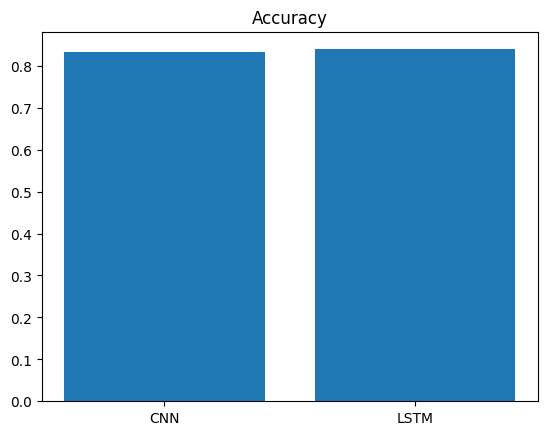

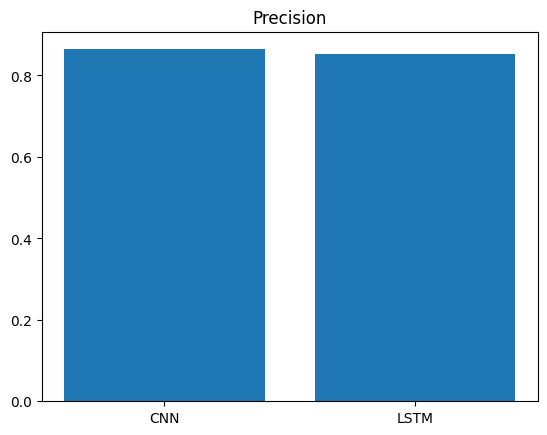

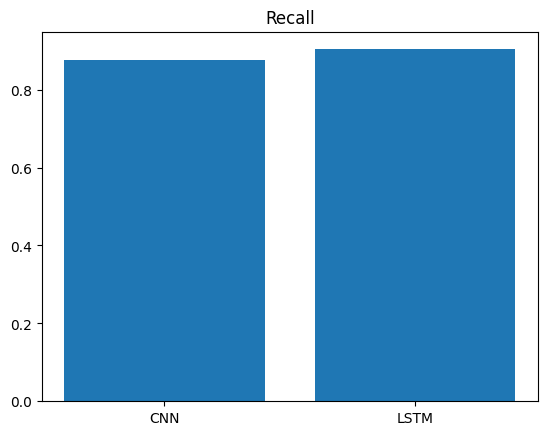

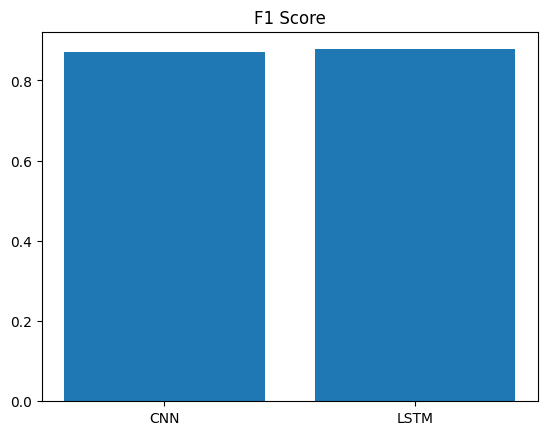

In [ ]:
import matplotlib.pyplot as plt

# Define the data to plot
accuracy_data = [(accuracy_list[0], accuracy_list[1]), ('CNN', 'LSTM')]
precision_data = [(precision_list[0], precision_list[1]), ('CNN', 'LSTM')]
recall_data = [(recall_list[0], recall_list[1]), ('CNN', 'LSTM')]
f1_data = [(f1_list[0], f1_list[1]), ('CNN', 'LSTM')]

# Create a bar graph for accuracy
plt.bar([0, 1], accuracy_data[0], tick_label=accuracy_data[1])
plt.title('Accuracy')
plt.show()

# Create a bar graph for precision
plt.bar([0, 1], precision_data[0], tick_label=precision_data[1])
plt.title('Precision')
plt.show()

# Create a bar graph for recall
plt.bar([0, 1], recall_data[0], tick_label=recall_data[1])
plt.title('Recall')
plt.show()

# Create a bar graph for F1 score
plt.bar([0, 1], f1_data[0], tick_label=f1_data[1])
plt.title('F1 Score')
plt.show()
